# Data Acquisition 

In [220]:
import pandas as pd

In [221]:
url = "https://raw.githubusercontent.com/mzhafranaf/Final-Project-Orbit/main/darjeeling.csv"
dataset = pd.read_csv(url)

In [222]:
dataset.head()

,month,season,Location,sex,Subject Code,TSV,TP,air_ts,air_tp,RH_ts,...,PMV,PPD,TnG_R_0.5,Tmr,Top,Tout,Trm,TnG_R_0.25,TnG_R_0.33,Unnamed: 32
0,1.0,1.0,S0135,1.0,FSL1,-1.0,-1,0,0,-1.0,...,0.768705,16.575062,26.948807,25.797614,24.948807,18.5,19.238792,28.948807,27.979110,0.0
1,1.0,1.0,S0135,1.0,FSL2,-1.0,-1,-1,0,1.0,...,0.236143,6.148326,26.860770,25.521541,24.860770,18.5,19.238792,28.860770,27.891073,0.0
2,1.0,1.0,S0135,1.0,FSL3,-1.0,-1,-1,0,1.0,...,0.246064,6.246280,26.948807,25.797614,24.948807,18.5,19.238792,28.948807,27.979110,0.0
3,1.0,1.0,S0135,1.0,FSL4,-1.0,-1,-1,0,1.0,...,0.299259,6.838386,26.843366,25.786732,24.843366,18.5,19.238792,28.843366,27.873669,0.0
4,1.0,1.0,S0135,1.0,FSL5,0.0,0,0,0,0.0,...,-0.444504,9.015203,24.755364,25.510728,24.755364,18.5,19.238792,24.755364,24.755364,0.0


In [223]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         2608 non-null   float64
 1   season        2608 non-null   float64
 2   Location      2608 non-null   object 
 3   sex           2608 non-null   float64
 4   Subject Code  2608 non-null   object 
 5   TSV           2608 non-null   float64
 6   TP            2608 non-null   object 
 7   air_ts        2608 non-null   object 
 8   air_tp        2608 non-null   object 
 9   RH_ts         2608 non-null   float64
 10  RH_tp         2608 non-null   float64
 11  comfort       2608 non-null   object 
 12  prod          2608 non-null   object 
 13  TA            2608 non-null   object 
 14  clo           2608 non-null   float64
 15  Uphols        2608 non-null   object 
 16  clo_tot       2608 non-null   float64
 17  met           2608 non-null   float64
 18  sh_sw         2608 non-null 

### Selection Feature

Dataset memiliki 3008 baris dan 33 fitur. Fitur yang digunakan untuk klasifikasi kenyamanan termal (*thermal comfort*) berdasarkan *Fanger's parameter* dan ASHRAE 55 :
- Indoor Air Termperature (Ti)
- Relative Humidity (RH)
- Temperature mean radiant (Tmr)
- Air Velocity (Va)
- Metabolism rate (met)
- Clothing insulation (clo)

Thermal Sensation Vote (TSV) merupakan skala yang menggambarkan sensasi yang dirasakan dari *cold* - *neutral* - *warm* dengan nilai -3 sampai +3

In [421]:
data = dataset[['Ti','RH', 'Tmr', 'Va', 'met', 'clo', 'TSV']]
data

,Ti,RH,Tmr,Va,met,clo,TSV
0,24.1,49.1,25.797614,0.1,1.25,0.98,-1.0
1,24.2,49.7,25.521541,0.1,1.00,0.86,-1.0
2,24.1,49.7,25.797614,0.1,1.00,0.85,-1.0
3,23.9,46.3,25.786732,0.1,1.00,0.93,-1.0
4,24.0,46.5,25.510728,0.1,1.10,0.40,0.0
...,...,...,...,...,...,...,...
3003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3006,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning Data

Data di atas masih perlu dicek ada/tidaknya *null/NaN value* untuk dibersihkan

In [422]:
data.isnull().sum()

Ti     400
RH     400
Tmr    400
Va     400
met    400
clo    400
TSV    400
dtype: int64

In [423]:
data = data.dropna()
data

,Ti,RH,Tmr,Va,met,clo,TSV
0,24.1,49.1,25.797614,0.1,1.25,0.980,-1.0
1,24.2,49.7,25.521541,0.1,1.00,0.860,-1.0
2,24.1,49.7,25.797614,0.1,1.00,0.850,-1.0
3,23.9,46.3,25.786732,0.1,1.00,0.930,-1.0
4,24.0,46.5,25.510728,0.1,1.10,0.400,0.0
...,...,...,...,...,...,...,...
2603,12.4,55.6,8.930533,0.1,1.10,0.987,-1.0
2604,13.8,55.5,14.198998,0.1,1.10,0.830,0.0
2605,14.2,53.8,12.796541,0.1,1.10,1.150,-1.0
2606,14.2,55.2,12.190274,0.1,1.10,0.920,-1.0


Selanjutnya dilakuakan pengecekan *unique feature* yaitu TSV untuk melihat ada tidaknya nilai string yang tidak merepresentasikan *Thermal Sensation Vote*

In [424]:
data = data.astype({'TSV':str})
data

,Ti,RH,Tmr,Va,met,clo,TSV
0,24.1,49.1,25.797614,0.1,1.25,0.980,-1.0
1,24.2,49.7,25.521541,0.1,1.00,0.860,-1.0
2,24.1,49.7,25.797614,0.1,1.00,0.850,-1.0
3,23.9,46.3,25.786732,0.1,1.00,0.930,-1.0
4,24.0,46.5,25.510728,0.1,1.10,0.400,0.0
...,...,...,...,...,...,...,...
2603,12.4,55.6,8.930533,0.1,1.10,0.987,-1.0
2604,13.8,55.5,14.198998,0.1,1.10,0.830,0.0
2605,14.2,53.8,12.796541,0.1,1.10,1.150,-1.0
2606,14.2,55.2,12.190274,0.1,1.10,0.920,-1.0


In [425]:
data.TSV.unique()

array(['-1.0', '0.0', '1.0', '-2.0', '2.0', '-3.0', '3.0'], dtype=object)

In [426]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2608 entries, 0 to 2607
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ti      2608 non-null   float64
 1   RH      2608 non-null   float64
 2   Tmr     2608 non-null   float64
 3   Va      2608 non-null   float64
 4   met     2608 non-null   float64
 5   clo     2608 non-null   float64
 6   TSV     2608 non-null   object 
dtypes: float64(6), object(1)
memory usage: 163.0+ KB


### Data Preparation

In [427]:
data.describe()

,Ti,RH,Tmr,Va,met,clo
count,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000
mean,20.625874,67.071547,21.393962,0.177312,1.115537,0.853717
std,4.918399,11.840747,5.983185,0.270664,0.121375,0.339475
min,8.200000,30.500000,8.119420,0.000000,0.700000,0.070000
25%,16.600000,60.400000,16.494298,0.100000,1.100000,0.580000
50%,20.100000,69.600000,20.991648,0.100000,1.100000,0.790000
75%,23.700000,75.300000,24.624755,0.100000,1.100000,1.060000
max,32.500000,94.000000,47.004464,2.200000,3.000000,2.300000


In [428]:
data['TSV'].value_counts()

-1.0    850
0.0     831
1.0     569
-2.0    182
2.0     102
-3.0     57
3.0      17
Name: TSV, dtype: int64

TP memiliki 7 kelas. Namun, untuk menyederhanakan klasifikasi supaya tidak terjadi *underfiting* karena persebaran data terlalu sedikit dengan model yang terlalu rumit, maka kelas akan disederhanakan dari 7 kelas menjadi 3 kelas saja.

In [430]:
comfortLevel = { '3.0':'warm',
                 '2.0':'warm',
                 '1.0':'warm',
                 '0.0':'neutral',
                '-1.0':'cold',
                '-2.0':'cold',
                '-3.0':'cold'}

data['comfortLevel'] = data['TSV'].map(comfortLevel)
data.head()

,Ti,RH,Tmr,Va,met,clo,TSV,comfortLevel
0,24.1,49.1,25.797614,0.1,1.25,0.98,-1.0,cold
1,24.2,49.7,25.521541,0.1,1.00,0.86,-1.0,cold
2,24.1,49.7,25.797614,0.1,1.00,0.85,-1.0,cold
3,23.9,46.3,25.786732,0.1,1.00,0.93,-1.0,cold
4,24.0,46.5,25.510728,0.1,1.10,0.40,0.0,neutral


In [431]:
data['comfortLevel'].value_counts()

cold       1089
neutral     831
warm        688
Name: comfortLevel, dtype: int64

# Data Exploration

In [433]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='comfortLevel', ylabel='count'>

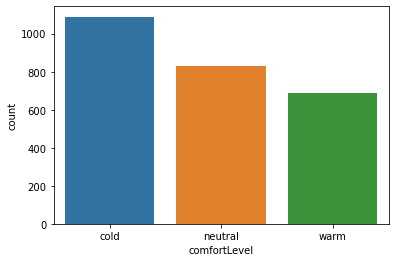

In [434]:
sns.countplot(x='comfortLevel', data=data)

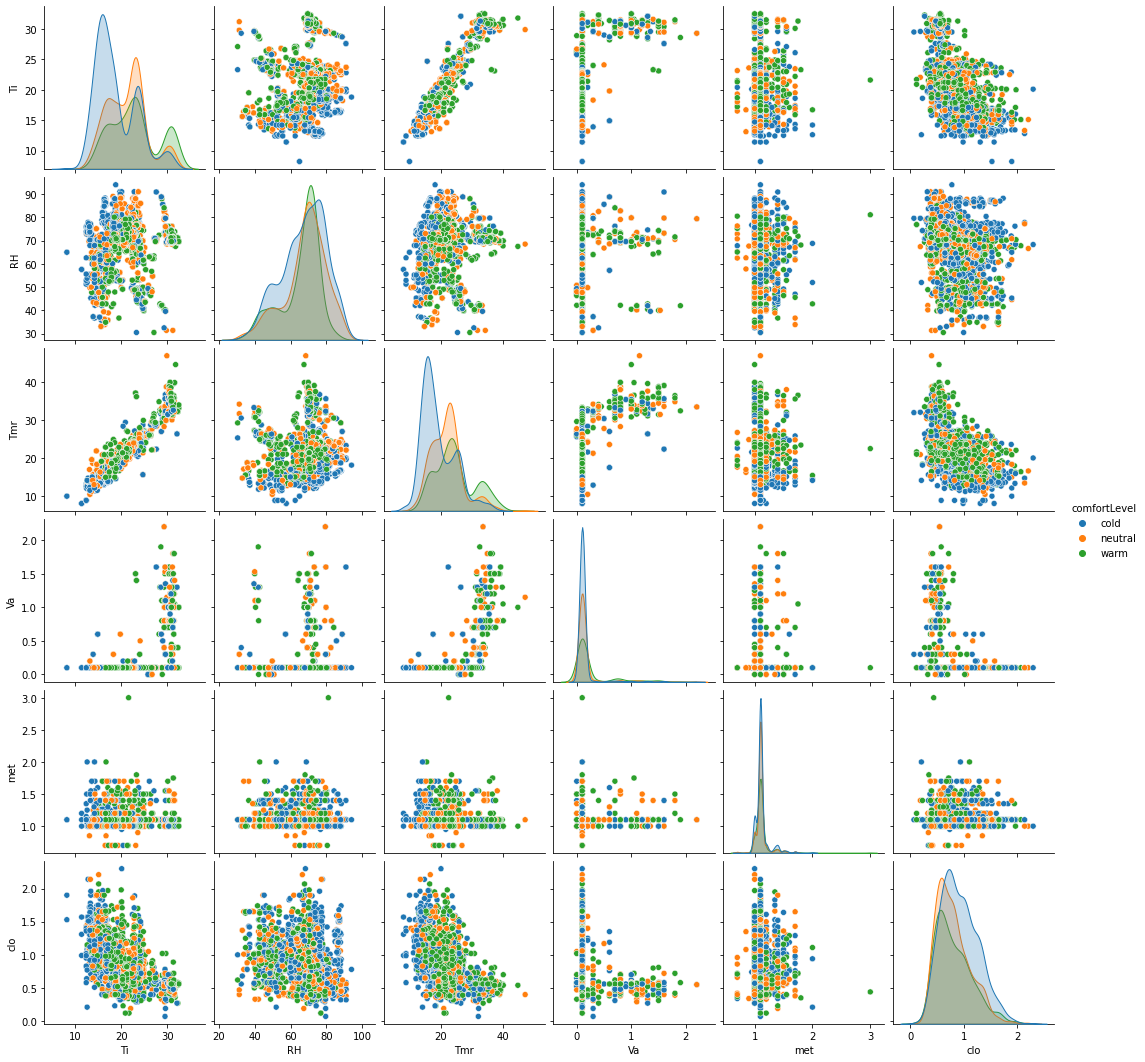

In [435]:
sns.pairplot(data=data, hue='comfortLevel')

<AxesSubplot:>

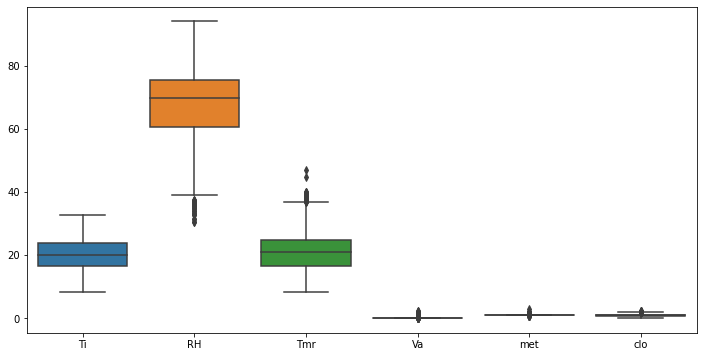

In [436]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data)

Dari boxplot di atas, masih terdapat *outlier* pada fitur Tmr, Va, met, dan clo. Untuk mengatasi masalah ini, maka nantinya akan dilakukan standarisasi saat modeling

<AxesSubplot:>

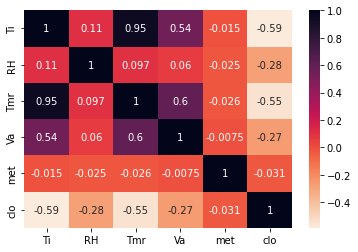

In [437]:
sns.heatmap(data.corr(),annot=True,cmap='rocket_r')

# Classification 

In [438]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

### Scaling Data

In [439]:
X = data.iloc[:,:-2]
y = data.iloc[:,-1]

scaler = StandardScaler()
X = scaler.fit_transform(X)

### Splitting Data

In [440]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [441]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1825, 6) (783, 6)
(1825,) (783,)


### Models Accuracy

In [442]:
modelsAccuracy = pd.DataFrame(columns=['Model', 'Accuracy'])

models = [('Logistic Regression', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()),
          ('Random Forest', RandomForestClassifier()),
          ('Decision Tree', DecisionTreeClassifier()),
          ('Naive Bayes', GaussianNB())]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)

    modelsAccuracy = modelsAccuracy.append({'Model': name, 'Accuracy': accuracy}, ignore_index=True)
    
    report = classification_report(y_test, y_pred)
    print(f'{name}\n{report}')
    
modelsAccuracy

Logistic Regression
              precision    recall  f1-score   support

        cold       0.53      0.71      0.60       331
     neutral       0.46      0.30      0.37       251
        warm       0.44      0.38      0.41       201

    accuracy                           0.49       783
   macro avg       0.48      0.46      0.46       783
weighted avg       0.48      0.49      0.48       783

KNN
              precision    recall  f1-score   support

        cold       0.59      0.75      0.66       331
     neutral       0.47      0.39      0.43       251
        warm       0.54      0.41      0.47       201

    accuracy                           0.55       783
   macro avg       0.54      0.52      0.52       783
weighted avg       0.54      0.55      0.54       783

SVM
              precision    recall  f1-score   support

        cold       0.58      0.71      0.64       331
     neutral       0.48      0.42      0.45       251
        warm       0.47      0.37      0.42    

,Model,Accuracy
0,Logistic Regression,0.492976
1,KNN,0.549170
2,SVM,0.531290
3,Random Forest,0.625798
4,Decision Tree,0.569604
5,Naive Bayes,0.486590


### Accuracy, Sensitivity, Specificity

##### Class Accuracy

In [443]:
classAcc = pd.DataFrame(columns=['Model','cold','neutral','warm'])

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    acc = cm.diagonal()/cm.sum(axis=1)
    
    classAcc = classAcc.append({'Model':name,'cold':acc[0],'neutral':acc[1],'warm':acc[2]}, ignore_index=True)

classAcc

,Model,cold,neutral,warm
0,Logistic Regression,0.706949,0.302789,0.378109
1,KNN,0.752266,0.394422,0.407960
2,SVM,0.709970,0.422311,0.373134
3,Random Forest,0.737160,0.553785,0.582090
4,Decision Tree,0.658610,0.498008,0.487562
5,Naive Bayes,0.706949,0.366534,0.273632


##### Sensitivity & Specificity

In [444]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # position
    n11 = cm[0][0]
    n12 = cm[0][1]
    n13 = cm[0][2]
    n21 = cm[1][0]
    n22 = cm[1][1]
    n23 = cm[1][2]
    n31 = cm[2][0]
    n32 = cm[2][1]
    n33 = cm[2][2]
    
    # sensitivity's formula
    s1 = n11/(n11+n12+n13)
    s2 = n22/(n21+n22+n23)
    s3 = n33/(n31+n32+n33)
    
    # specificity's formula
    c1 = (n22 + n33)/(n21+n31+n22+n33)
    c2 = (n11 + n33)/(n12+n32+n11+n33)
    c3 = (n11 + n22)/(n13+n23+n11+n22)
        
    senSpec = pd.DataFrame({'Class':['Cold','Neutral','Warm'],
                             'Sensitivity':[s1, s2, s3],
                             'Specificity':[c1, c2, c3]})
    sensitivity = (s1+s2+s3)/3
    specificity = (c1+c2+c3)/3
    
    print(f'{name}\n{senSpec}')
    print(f'Overall sensitivity : {sensitivity}')
    print(f'Overall specivicity : {specificity}\n')

Logistic Regression
     Class  Sensitivity  Specificity
0     Cold     0.706949     0.418733
1  Neutral     0.302789     0.778894
2     Warm     0.378109     0.759804
Overall sensitivity : 0.46261564594707205
Overall specivicity : 0.6524770587665275

KNN
     Class  Sensitivity  Specificity
0     Cold     0.752266     0.509859
1  Neutral     0.394422     0.750567
2     Warm     0.407960     0.834532
Overall sensitivity : 0.5182161235963791
Overall specivicity : 0.6983194741514445

SVM
     Class  Sensitivity  Specificity
0     Cold     0.709970     0.518625
1  Neutral     0.422311     0.729412
2     Warm     0.373134     0.802353
Overall sensitivity : 0.501804957949986
Overall specivicity : 0.683463115905388

Random Forest
     Class  Sensitivity  Specificity
0     Cold     0.722054     0.676712
1  Neutral     0.533865     0.765217
2     Warm     0.562189     0.840090
Overall sensitivity : 0.6060359924078967
Overall specivicity : 0.7606732700538537

Decision Tree
     Class  Sensitivi

### Confusion Matrix

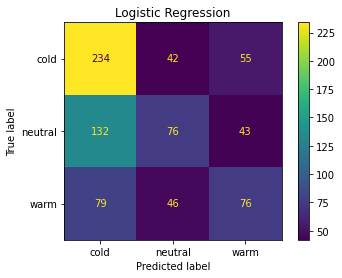

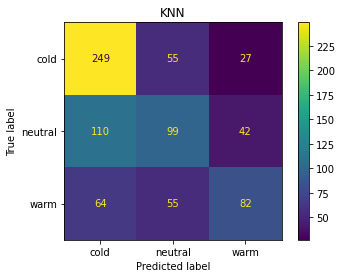

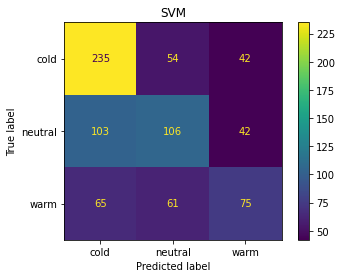

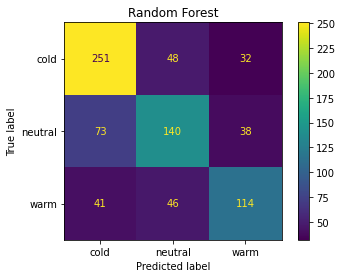

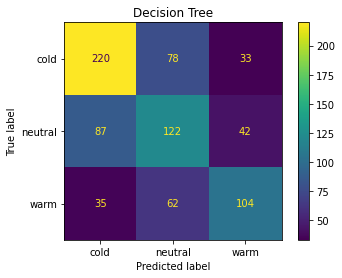

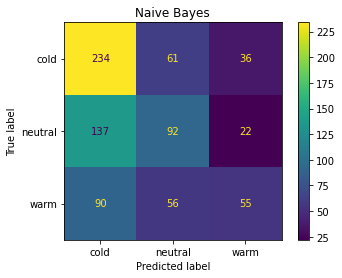

In [445]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['cold','neutral','warm'])
    
    disp.plot()
    plt.title(name)

# Cross Validation

In [446]:
from sklearn.model_selection import cross_val_score

In [447]:
scoreCV = pd.DataFrame(columns=['Model', 'Cross Val Score'])

for name, model in models:
    score = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    print(f'{name} : {score}')
    
    scoreCV = scoreCV.append({'Model':name, 'Cross Val Score':score.mean()}, ignore_index=True)

scoreCV

Logistic Regression : [0.27969349 0.28735632 0.60536398 0.62452107 0.39846743 0.67816092
 0.5440613  0.42528736 0.43076923 0.43076923]
KNN : [0.31800766 0.3256705  0.40613027 0.34099617 0.43678161 0.47126437
 0.44061303 0.4137931  0.41923077 0.47307692]
SVM : [0.27586207 0.28735632 0.63218391 0.39846743 0.49425287 0.70114943
 0.51724138 0.46360153 0.48461538 0.5       ]
Random Forest : [0.348659   0.25287356 0.28735632 0.26819923 0.43295019 0.40229885
 0.35249042 0.43295019 0.45       0.5       ]
Decision Tree : [0.33333333 0.26436782 0.23371648 0.27586207 0.50191571 0.31417625
 0.43678161 0.44061303 0.39615385 0.46538462]
Naive Bayes : [0.31417625 0.29118774 0.70114943 0.7394636  0.38697318 0.69731801
 0.51340996 0.49425287 0.43076923 0.45      ]


,Model,Cross Val Score
0,Logistic Regression,0.470445
1,KNN,0.404556
2,SVM,0.475473
3,Random Forest,0.372778
4,Decision Tree,0.366230
5,Naive Bayes,0.501870
